## Regresión logística 

El clasificador de regresion logistica, se utilixa para problemas bicalses y en donde las clases son linealmente separables. Sus prestaciones se pueden extender a problemas multiclase a través de la técnica *one vs rest* u OvR. este clasificador parte de la probabilidad a favor de un determinado evento, definida por la *razon de momios*



1. Función para clases linealmente separables 

2. Problemas binarios o biclase: One vs REst(OvR. Extiende los problemas multiclases existen dos clases. clase control y clase de caso

### Razón de momios
Definicion: "odds ratio" que tan favorecido esta un evento

Funcion: 

$${OR}=\frac{p}{1-p},$$

donde $p$ es la probabilidad del evento.

Al OR le podemos calcular el logaritmo para obtener la función **logit**

$$logit(p)=\log\frac{p}{1-p}$$

En términos de los parametros de entrada de nuestro calsificador tendremos:

$$logit(p)=logit(p(y=1|\mathbf{x}))=w_0x_0+w_1x_1+\dots+w_{1-p}x_{1-p}=\sum_{i=0}^{1-p}w_ix_i=\mathbf{w}^{\top}\mathbf{x}$$

lo que queremos hace es depejar la probabilidad del evento, que se va a relacionar con la probabilidad de que una observación pertenezca a la clase con etiqueta $y=1$. Para ella utilizamos la función inversa, que se denomina **sigmoide**

$$\phi(z)=\frac{1}{1+e^{-z}}$$

Graficamente tendremos:

In [4]:
import matplotlib.pyplot as plt #libreria para graficar
import numpy as np #libreria numérica

# definimos la funcion sigmoide
def sigmoide(z):
    funcion_sigmoide = 1.0/(1.0 + np.exp(-z))
    return funcion_sigmoide

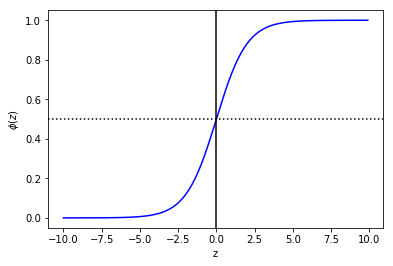

In [12]:
# para probarla necesitamos un vector de entrada que es Z
z = np.mgrid[-10:10:0.1] #declaramos un arreglo tipo mesh grid
fi = sigmoide(z)

# para la gráfica
plt.plot(z,fi,color='b')
plt.axvline(0,0,color='k') #trazamos una linea verical por (0,0) de color negro
plt.axhline(y=0.5,ls='dotted',color='k') #linea horizaontal por 0.5, punteada y de color negro
plt.ylabel('$\phi(z)$')
plt.xlabel('z')
plt.show()


# Base de datos (Iris)

la base de datos Iris es muy utilizada para probar los algoritmos de ML.
Consiste en 150 observaciones y 3 clases (50 observaciones por clases). Las tres clases son las siguientes: *Iris Setosa*, *Iris Versicolor*, *Iris Virginica*. Cada Observación tiene 4 caracteristicas: largo y ancho del sépalo y el largo y ancho del pétalo.

![Iris](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/P%C3%A9talo-s%C3%A9palo.jpg/220px-P%C3%A9talo-s%C3%A9palo.jpg)

In [14]:
# Para cargar la base de datos
from sklearn import datasets

iris = datasets.load_iris()   #Se carga la base de datos
X = iris.data[:,[2,3]]        #La matriz de datos (solo se toman 2 carac. para la visualización)
y = iris.target               #las etiquetas
print(np.unique(y))

[0 1 2]


In [43]:
from sklearn.linear_model import LogisticRegression   #Importa las fxn de validacion cruzadas
from sklearn.cross_validation import train_test_split #Importa las funciones de validación cruzada
from sklearn.preprocessing import StandardScaler      #Importar las funciones de preparacion 

#hacemos la división del conjunto de entrenamiento y el conjunto de validación

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state = 0)

#nomralizacion de x_train
x_norm_train,t_train_mean,t_train_desv = Remocion(X_train)
#Normalizacion para x_test
x_norm_test = Remocion_test(X_test,t_train_mean,t_train_desv)

#Entrenamos el clasificador
clasificador = LogisticRegression(C=1.0,random_state=0) # C es el parametro
clasificador.fit(x_norm_train, y_train) # entrenamiento del clasificador



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
# para validar el clasificador
y_pred = clasificador.predict(x_norm_test)
print('Las muestras mal clasificadas fueron de %d '%(y_test != y_pred).sum())

Las muestras mal clasificadas fueron de 9 


In [37]:
#Remoción para x_train
def Remocion(X):
    med = X.mean(axis=0)
    des = X.std(axis=0)
    X = X - med
    X = X/des
    return X,med, des

In [38]:
#Remocion para x_test
def Remocion_test(X,med,des):
    X = X - med
    X = X/des
    return X